In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [86]:
# reading the excel into a DataFrame
df_crowdfunding = pd.read_excel('Crowdfunding campaign.xlsx')
df_crowdfunding

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus,delivery
0,71762,0,2500,0.040000,0,1,0.0,Kentucky,2011,0.0,NaN
1,72367,0,1500,1.733333,0,0,0.0,Indiana,2012,0.0,NaN
2,73646,1,100000,1.007510,1,0,0.0,Louisiana,2012,0.0,NaN
3,74867,1,7000,0.000000,0,1,0.0,North Carolina,2012,0.0,NaN
4,82829,1,2000,1.000000,0,1,0.0,Pennsylvania,2011,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
434,242139,1,100000,2.139170,1,0,1.0,California,2013,1.0,NaN
435,242139,1,100000,2.139170,1,0,1.0,California,2013,1.0,NaN
436,242139,1,100000,2.139170,1,0,1.0,California,2013,1.0,NaN
437,250311,1,5000,1.007000,0,1,0.0,Kentucky,2012,0.0,NaN


In [87]:
# analysing the data
df_crowdfunding.describe()

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus,delivery
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,433.000000,439.000000,435.000000,150.000000
mean,168412.738041,0.612756,22841.232346,2.940869,0.530752,0.362187,0.200924,2012.740319,0.177011,0.800000
std,40862.842231,0.487676,31459.342081,5.751079,0.499623,0.481181,0.401155,0.506570,0.382118,0.375419
min,71762.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000,0.000000
25%,142194.500000,0.000000,2000.000000,0.190100,0.000000,0.000000,0.000000,2013.000000,0.000000,1.000000
50%,163595.000000,1.000000,10000.000000,1.037100,1.000000,0.000000,0.000000,2013.000000,0.000000,1.000000
75%,200846.000000,1.000000,25000.000000,1.930000,1.000000,1.000000,0.000000,2013.000000,0.000000,1.000000
max,256198.000000,1.000000,200000.000000,25.918080,1.000000,1.000000,1.000000,2013.000000,1.000000,1.000000


In [88]:
# removing duplicates
df_crowdfunding.drop_duplicates(subset='cid', keep = 'first', inplace = True)
df_crowdfunding.drop(columns = ["cid"], inplace = True)
df_crowdfunding

,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus,delivery
0,0,2500,0.040000,0,1,0.0,Kentucky,2011,0.0,NaN
1,0,1500,1.733333,0,0,0.0,Indiana,2012,0.0,NaN
2,1,100000,1.007510,1,0,0.0,Louisiana,2012,0.0,NaN
3,1,7000,0.000000,0,1,0.0,North Carolina,2012,0.0,NaN
4,1,2000,1.000000,0,1,0.0,Pennsylvania,2011,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
219,0,1500,1.088000,0,1,0.0,Illinois,2012,0.0,NaN
220,0,10000,1.005000,0,1,0.0,New York,2012,0.0,NaN
221,1,5000,1.007000,0,1,0.0,Kentucky,2012,0.0,NaN
222,1,2000,8.188500,1,0,0.0,Georgia,2013,0.0,1.0


In [6]:
df_crowdfunding.describe()

,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus,delivery
count,224.000000,224.000000,224.000000,224.000000,224.000000,219.000000,224.000000,221.000000,53.000000
mean,0.491071,17412.232143,1.749669,0.459821,0.415179,0.214612,2012.651786,0.117647,0.801887
std,0.501040,31524.139163,3.644054,0.499499,0.493856,0.411493,0.563618,0.322921,0.384053
min,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000,0.000000
25%,0.000000,1262.500000,0.005571,0.000000,0.000000,0.000000,2012.000000,0.000000,1.000000
50%,0.000000,5000.000000,1.014500,0.000000,0.000000,0.000000,2013.000000,0.000000,1.000000
75%,1.000000,15000.000000,1.750000,1.000000,1.000000,0.000000,2013.000000,0.000000,1.000000
max,1.000000,200000.000000,25.918080,1.000000,1.000000,1.000000,2013.000000,1.000000,1.000000


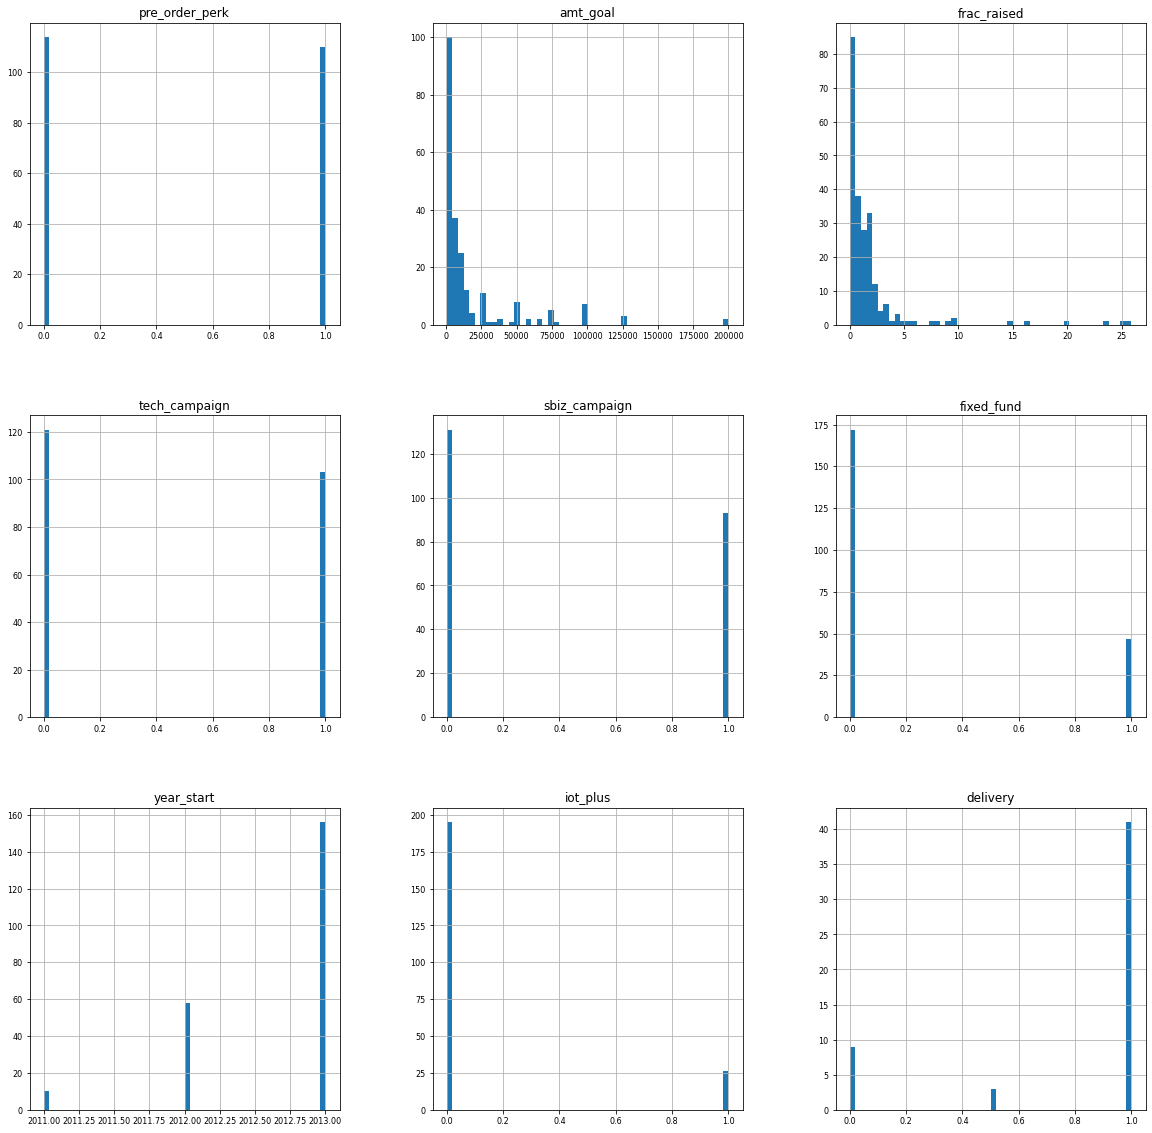

In [7]:
# Histograms
df_crowdfunding.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

<AxesSubplot:>

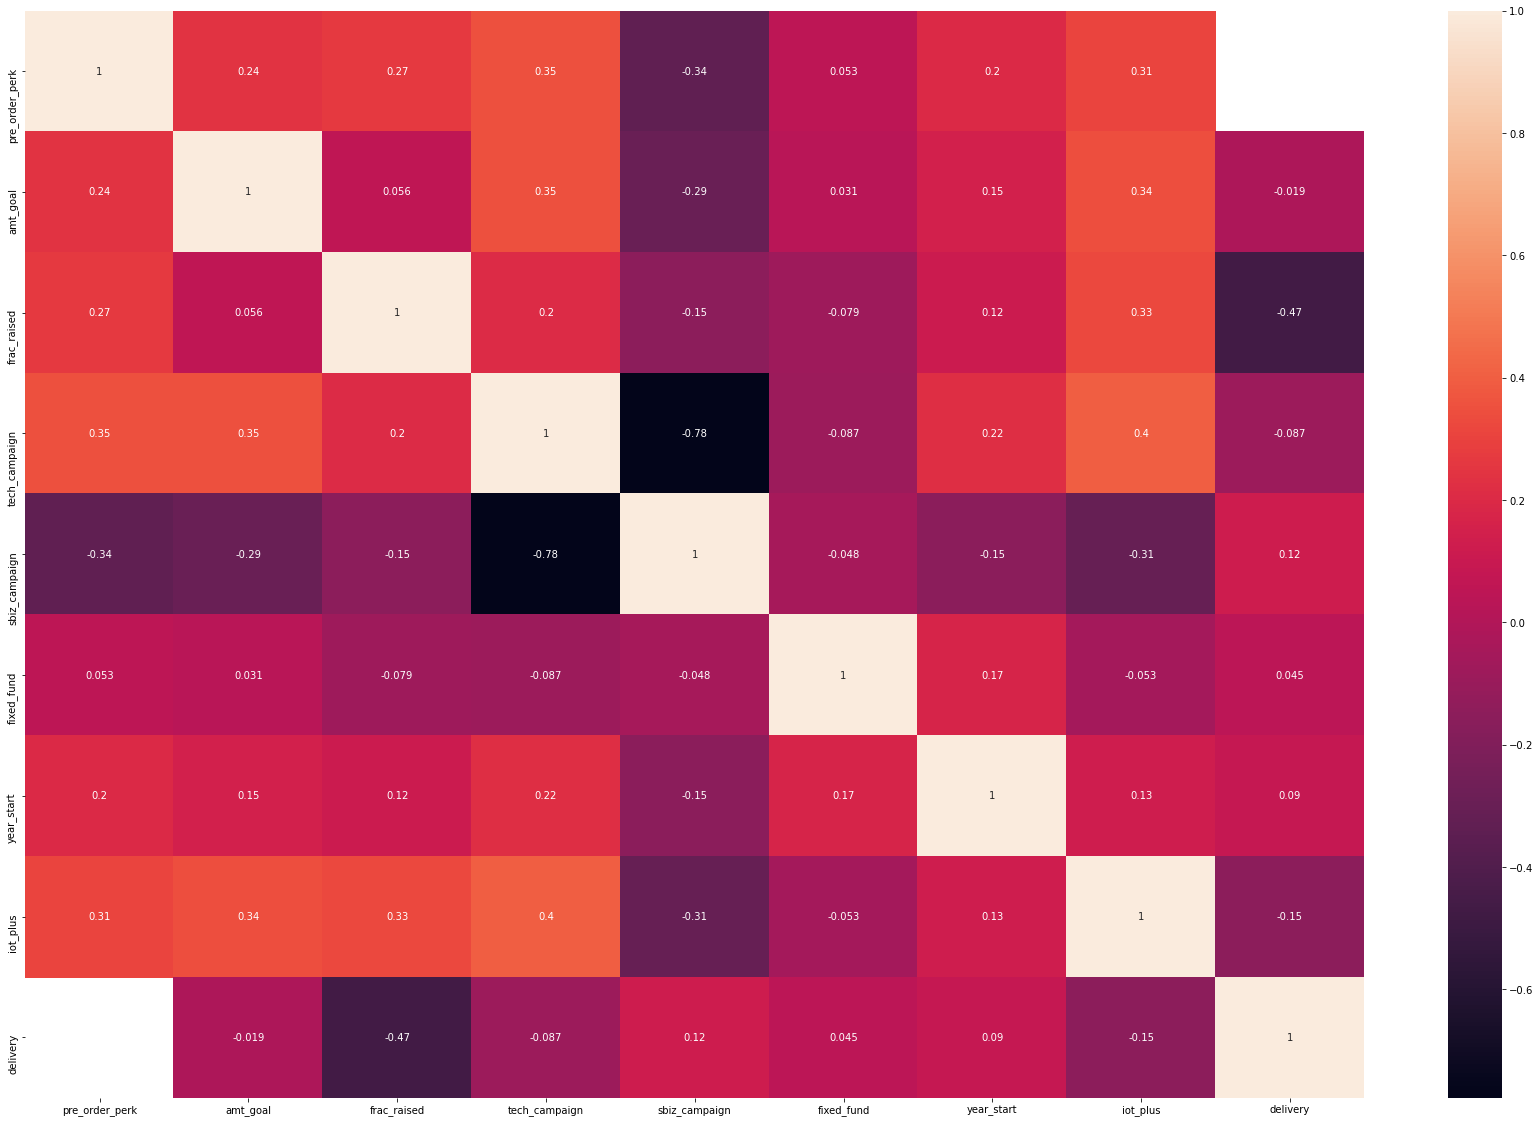

In [8]:
# Heat Map of the data
plt.figure(figsize = (30,20))
sns.heatmap(df_crowdfunding.corr(), annot = True)

In [90]:
target = df_crowdfunding.frac_raised
features = df_crowdfunding.drop(columns = ["frac_raised",'amt_goal','delivery','state'])

In [91]:
target

0      0.040000
1      1.733333
2      1.007510
3      0.000000
4      1.000000
         ...   
219    1.088000
220    1.005000
221    1.007000
222    8.188500
223    0.000000
Name: frac_raised, Length: 224, dtype: float64

In [92]:
features

,pre_order_perk,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus
0,0,0,1,0.0,2011,0.0
1,0,0,0,0.0,2012,0.0
2,1,1,0,0.0,2012,0.0
3,1,0,1,0.0,2012,0.0
4,1,0,1,0.0,2011,0.0
...,...,...,...,...,...,...
219,0,0,1,0.0,2012,0.0
220,0,0,1,0.0,2012,0.0
221,1,0,1,0.0,2012,0.0
222,1,1,0,0.0,2013,0.0


In [93]:
features.dropna(inplace = True)
features.dropna(inplace=True)
target = target.reindex_like(cat_features)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

{'alpha': 100}
-15.061057062791736


/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frac_raised', ylabel='Density'>

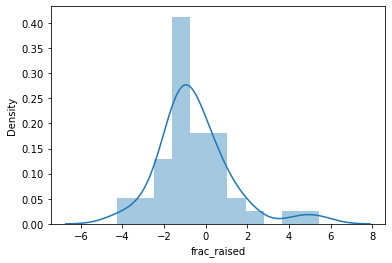

In [96]:
# Ridge Regression
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train_scaled,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

prediction_ridge=ridge_regressor.predict(X_test_scaled)
sns.distplot(y_test-prediction_ridge)

{'alpha': 0.01}
-15.39392409211342


/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frac_raised', ylabel='Density'>

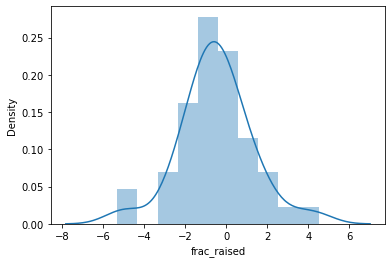

In [97]:
# Lasso Regression
lasso=Lasso()
parameters={'alpha':[0.0001,0.001,0.01,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train_scaled,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

prediction_lasso=lasso_regressor.predict(X_test_scaled)


sns.distplot(y_test-prediction_lasso)

Text(0.5, 1.0, 'Coefficients - Lasso Regression (a = 0.01)')

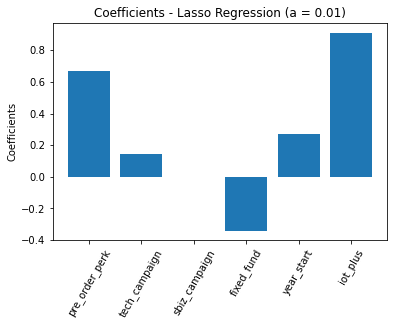

In [103]:
names = features.columns
lasso = Lasso(alpha=0.01)
lasso_coef= lasso.fit(X_train_scaled, y_train).coef_

plt.bar(range(len(names)),lasso_coef)
plt.xticks(range(len(names)),names, rotation=60)
plt.ylabel("Coefficients")
plt.title("Coefficients - Lasso Regression (a = 0.01)")

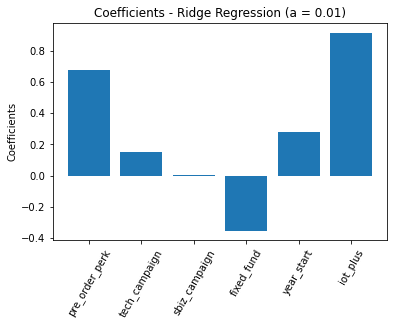

In [102]:

names = features.columns
ridge = Ridge(alpha=0.01)
ridge_coef=ridge.fit(X_train_scaled,y_train).coef_
plt.bar(range(len(names)),ridge_coef)
plt.xticks(range(len(names)),names, rotation=60)
plt.ylabel("Coefficients")
plt.title("Coefficients - Ridge Regression (a = 0.01)")
plt.show()

In [104]:
print(X_train)
print(X_test)
print(y_test)
print(y_train)

     pre_order_perk  tech_campaign  sbiz_campaign  fixed_fund  year_start  \
138               0              1              0         1.0        2013   
125               1              1              0         0.0        2013   
22                0              0              0         0.0        2011   
81                1              1              0         0.0        2013   
46                1              1              0         0.0        2013   
..              ...            ...            ...         ...         ...   
68                1              1              0         0.0        2013   
196               1              1              0         0.0        2013   
119               0              0              1         1.0        2013   
48                0              0              1         1.0        2013   
174               0              1              0         0.0        2012   

     iot_plus  
138       0.0  
125       0.0  
22        0.0  
81        0

In [105]:
# KNN Regression
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
knn_reg = KNeighborsRegressor(n_neighbors=neighbors)
knn_reg.fit(X_train, y_train)
knn_reg.predict(X_test)
knn_reg.score(y_test)

TypeError: '<' not supported between instances of 'list' and 'int'